In [5]:
import pandas, numpy, pyensae, os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

path ="/home/user/PROJETS/DATA"
os.chdir(path)

#Fichier texte transformé en .CSV avec séparateur ; et décimal ,
mydata = pandas.read_csv("VOITURES.csv", sep=";", header = 0, decimal= ",")
mydata.head()
mydata.describe()

,PUISS,CYLI,VITE,LONG,LARG,POIDS,RESE,COFFRE,CONS,PRIX
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,118.400000,1916.633333,189.266667,426.800000,170.700000,1150.966667,59.616667,345.666667,8.320000,131815.266667
std,41.372655,589.308624,24.090252,39.732207,7.259477,241.975987,11.763241,112.293437,1.633359,59532.874781
min,50.000000,954.000000,145.000000,343.000000,155.000000,640.000000,36.000000,168.000000,5.800000,45898.000000
25%,95.000000,1595.500000,176.000000,401.250000,169.000000,1000.000000,53.500000,252.500000,7.350000,86050.000000
50%,115.000000,1802.500000,185.500000,443.000000,170.000000,1207.500000,60.000000,326.000000,8.250000,118250.000000
75%,148.500000,1998.000000,213.750000,452.750000,175.750000,1332.500000,65.750000,454.250000,9.450000,167750.000000
max,205.000000,2975.000000,226.000000,473.000000,183.000000,1590.000000,80.000000,530.000000,12.500000,268000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26a7382128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26a4dc3f28>]], dtype=object)

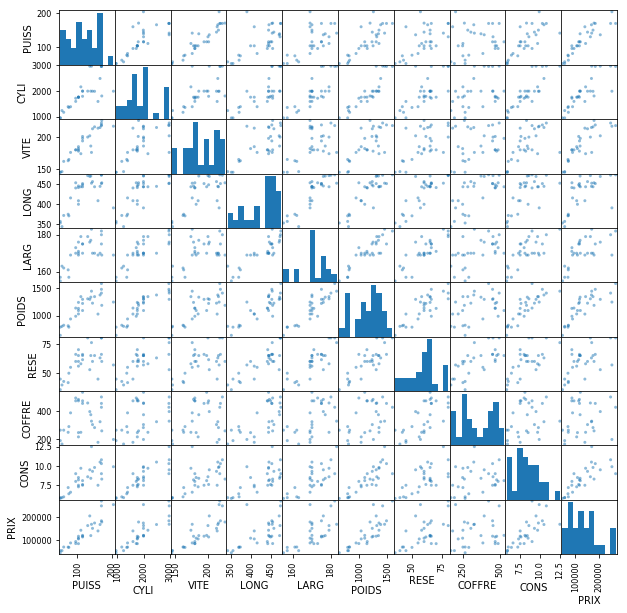

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(mydata,figsize=(10,10))

In [14]:
from sklearn import preprocessing
mydata_cr = preprocessing.scale(mydata.select_dtypes(exclude=['object']))
mydata_cr.view()

array([[-1.55861014, -1.169536  , -1.82672733, -2.14517614, -1.07881517,
        -1.45419824, -1.6961327 , -1.60921179, -1.50693774, -1.31235798],
       [-1.43569136, -1.28689806, -1.15120413, -1.42841084, -1.21892104,
        -1.37013244, -1.43674113, -0.7306365 , -1.44466758, -1.0475467 ],
       [-0.94401624, -0.90892317, -0.56012132, -0.30206537, -0.23817997,
        -0.88675409, -0.39917482,  0.36531825, -1.07104665, -0.74856623],
       [-0.5752599 , -0.33764606, -0.39124052,  0.67068753,  0.32224349,
        -0.67658959,  0.55192763,  1.30729588, -0.19926449, -0.79298619],
       [-0.08358477,  0.14043177,  0.19984228,  0.61949001,  0.60245523,
         0.62643033,  0.55192763,  0.96311175, -0.51061527, -0.25311288],
       [ 1.26852182,  1.80593755,  1.25534729,  0.61949001,  0.60245523,
         1.39983569,  0.55192763,  0.96311175,  1.23294906,  0.87447061],
       [ 1.26852182,  1.80593755,  1.21312709,  1.18266274,  1.58319629,
         1.84538444,  1.76242166,  0.71855986

In [21]:
X_reduced =  PCA(n_components=3).fit_transform(mydata_cr)
print(X_reduced)


[[  4.79125196e+00   5.48208874e-01   8.56353097e-01]
 [  4.00700528e+00   4.54065584e-02  -3.81693575e-02]
 [  1.91476539e+00  -9.74608489e-01  -4.22582149e-01]
 [  2.21087098e-01  -1.92640989e+00  -2.91648130e-01]
 [ -8.27150517e-01  -1.22475587e+00  -4.09843752e-01]
 [ -3.33978559e+00   3.19488334e-01  -5.18271267e-02]
 [ -4.54445305e+00   1.09430893e-01  -1.36726788e-01]
 [  5.01952895e+00   2.75791089e-01   3.98433913e-01]
 [  3.72471853e+00   8.61944349e-02  -2.81462399e-01]
 [  9.55431794e-01   4.60547769e-01   5.86105148e-01]
 [  1.38702728e-01  -1.73389014e+00  -3.38517000e-01]
 [ -4.60682873e+00  -1.62617785e-01  -9.88604482e-02]
 [  5.56207572e+00   8.94764950e-02  -2.06360196e-02]
 [  1.30745962e+00   5.46566917e-01   2.15958214e-01]
 [ -4.56897810e-01  -1.60640713e+00   9.51227750e-02]
 [ -2.25151174e+00  -1.28943775e+00  -2.98227631e-01]
 [  3.61585397e+00   4.37222388e-01   3.01419391e-01]
 [ -5.18823341e-01  -1.35005924e+00  -8.89345862e-01]
 [ -5.69492335e-01  -1.14726

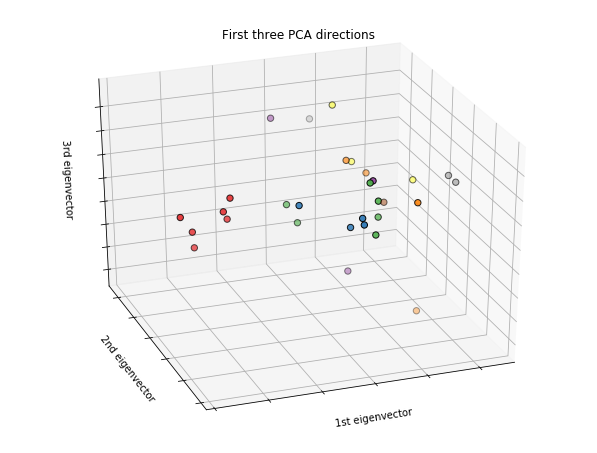

In [22]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=mydata['PRIX'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()